In [2]:
# importing the required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
# reading the CSV raw data thorugh pandas
df_attr = pd.read_csv(r'C:\Users\naman\Downloads\DMDDA3\DMDDA3\Tourist Attractions\Input_US_Attractions.csv')
df_attr.head()

,name,rating,reviews_count,description,image,city
0,"Museum of Fine Arts, Boston",4.8,"(14,031)",Impressionist art & Egyptian treasures,NaN,Boston
1,Faneuil Hall,4.5,"(38,402)",Historic indoor-outdoor shopping center,NaN,Boston
2,Fenway Park,4.8,"(33,190)",Legendary home of the Red Sox,NaN,Boston
3,Isabella Stewart Gardner Museum,4.7,"(6,741)",Art treasures in a Venetian-style palace,NaN,Boston
4,Museum of Science,4.7,"(17,512)",Interactive exhibits & an IMAX theater,NaN,Boston


In [4]:
# basic information for dataframe
df_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4331 entries, 0 to 4330
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           4331 non-null   object 
 1   rating         4089 non-null   float64
 2   reviews_count  4089 non-null   object 
 3   description    3160 non-null   object 
 4   image          0 non-null      float64
 5   city           4331 non-null   object 
dtypes: float64(2), object(4)
memory usage: 203.1+ KB


In [5]:
# data cleaning for tourist attractions
df_attr['reviews_count'] = df_attr['reviews_count'].str[1:-1].str.replace(',','')
df_attr = df_attr.drop(columns = 'image')
df_attr['rating'] = df_attr['rating'].fillna(0)
df_attr['reviews_count'] = df_attr['reviews_count'].fillna(0)
df_attr = df_attr.drop_duplicates(subset=['name'])

In [6]:
# dictionary for data type modifications
dict_dtype = {
    'name':str,
    'rating':float,
    'reviews_count':int,
    'description':str,
    'city':str,
}
# iterating the dictionary keys to change datatypes as per the required format
for key in dict_dtype.keys():
    df_attr[key] = df_attr[key].astype(dict_dtype[key])

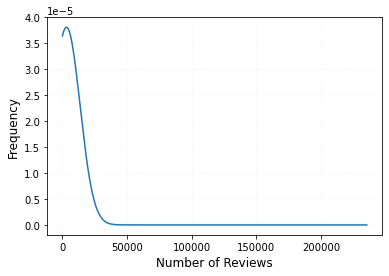

In [7]:
# mean review count from dataframe
mu = np.mean(df_attr["reviews_count"])
# standard deviation review count from dataframe
sigma = np.std(df_attr["reviews_count"])

# numpy random normalizing
s = np.random.normal(mu, sigma, 1000)

# Calculating probability density function (PDF)
pdf = stats.norm.pdf(df_attr["reviews_count"].sort_values(), mu, sigma)

# Drawing a graph
plt.plot(df_attr["reviews_count"].sort_values(), pdf)
plt.xlabel("Number of Reviews", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.1, linestyle="--")
# show plots
plt.show()

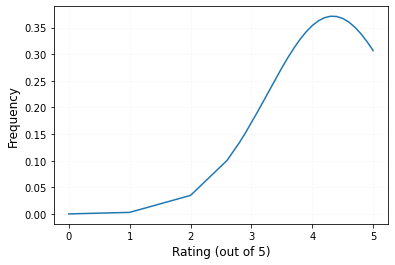

In [8]:
# mean rating from dataframe
mu = np.mean(df_attr["rating"])
# standard deviation rating from dataframe
sigma = np.std(df_attr["rating"])

# numpy random normalizing
s = np.random.normal(mu, sigma, 1000)

# Calculating probability density function (PDF)
pdf = stats.norm.pdf(df_attr["rating"].sort_values(), mu, sigma)

# Drawing a graph
plt.plot(df_attr["rating"].sort_values(), pdf)
plt.xlabel("Rating (out of 5)", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.1, linestyle="--")
# show plots
plt.show()

<AxesSubplot:xlabel='rating'>

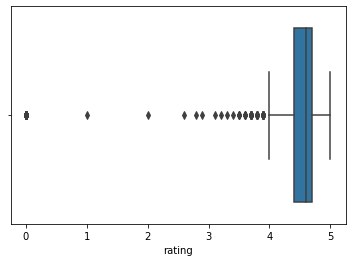

In [6]:
# box plot for ratings
sns.boxplot(x ='rating', data=df_attr)

<AxesSubplot:xlabel='reviews_count'>

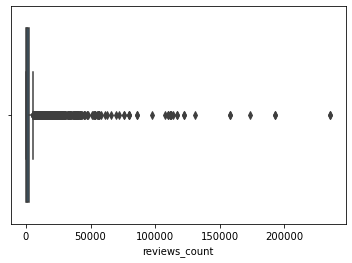

In [7]:
# box plot for review counts
sns.boxplot(x ='reviews_count', data=df_attr)

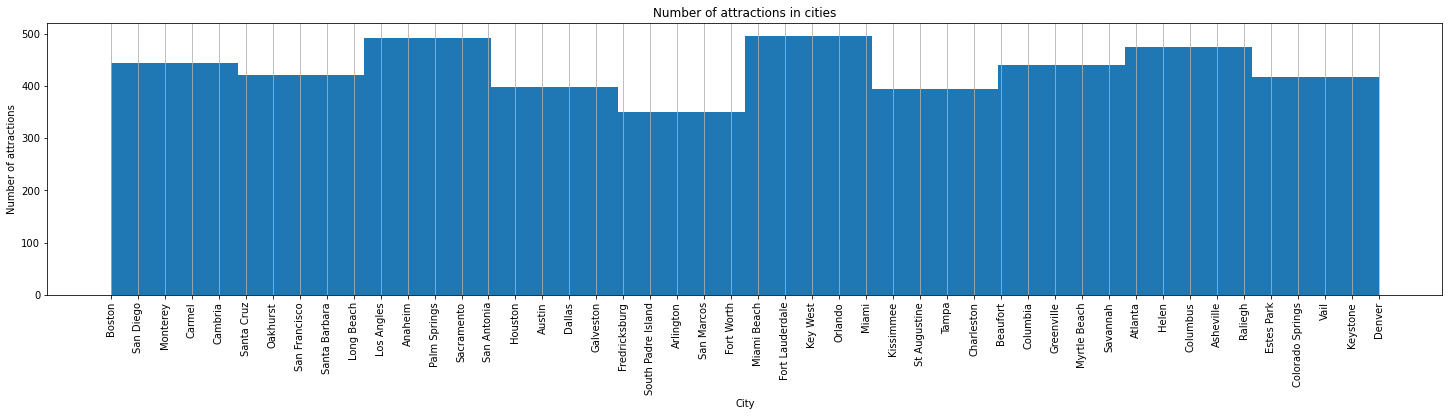

In [8]:
# bar chart for Number of Attractions in top destinations
# resixing the figure plot
fig = plt.figure(figsize = (25,5))
ax = fig.gca()
df_attr['city'].hist(ax=ax)
# formatting the plot
plt.title('Number of attractions in cities')
plt.xlabel('City')
plt.ylabel('Number of attractions')
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.5)

In [9]:
# reverifying the data after munging
df_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4331 entries, 0 to 4330
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           4331 non-null   object 
 1   rating         4331 non-null   float64
 2   reviews_count  4331 non-null   int32  
 3   description    4331 non-null   object 
 4   city           4331 non-null   object 
dtypes: float64(1), int32(1), object(3)
memory usage: 152.4+ KB


In [13]:
# writing the final output as CSV
df_attr.to_csv(r'C:\Users\naman\PycharmProjects\DMDDA3\Output_US_Attractions.csv')